In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Set the maximum number of columns to display
pd.options.display.max_columns = None

# Set the maximum number of rows to display
pd.options.display.max_rows = None

In [4]:
df_1 = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df_2 = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [5]:

# -----------------------------
# 🛠️ Step 1: convert JSON string to list/dict
# -----------------------------
def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

df_1['cast'] = df_1['cast'].apply(safe_eval)
df_1['crew'] = df_1['crew'].apply(safe_eval)

# -----------------------------
# 🛠️ Step 2: (Top 3 cast)
# -----------------------------
df_1['top_cast'] = df_1['cast'].apply(lambda x: [i['name'] for i in x[:3]] if isinstance(x, list) else [])

# -----------------------------
# 🛠️ Step 3: cast size
# -----------------------------
df_1['cast_size'] = df_1['cast'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# -----------------------------
# 🛠️ Step 4: (Director)
# -----------------------------
def get_director(crew_list):
    if isinstance(crew_list, list):
        for person in crew_list:
            if person.get('job') == 'Director':
                return person['name']
    return None

df_1['director'] = df_1['crew'].apply(get_director)

# -----------------------------
# 🛠️ Step 5: choose important column
# -----------------------------
clean_df_1 = df_1[['title', 'top_cast', 'cast_size', 'director']]





In [6]:
clean_df_1['actor_1'] = clean_df_1['top_cast'].apply(lambda x: x[0] if len(x) > 0 else None)
clean_df_1['actor_2'] = clean_df_1['top_cast'].apply(lambda x: x[1] if len(x) > 1 else None)
clean_df_1['actor_3'] = clean_df_1['top_cast'].apply(lambda x: x[2] if len(x) > 2 else None)

In [7]:
clean_df_1.head()

,title,top_cast,cast_size,director,actor_1,actor_2,actor_3
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",83,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",34,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",83,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",158,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",27,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton


In [8]:
clean_df_1['top_cast'][0][0]

'Sam Worthington'

In [9]:
# -----------------------------
# 🛠️ Step 1: convert JSON string to list/dict
# -----------------------------
def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

# ---------------------------
# 🛠️ Genres
# ---------------------------
df_2['genres'] = df_2['genres'].apply(safe_eval)
df_2['genres'] = df_2['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# ---------------------------
# 🛠️ Keywords
# ---------------------------
df_2['keywords'] = df_2['keywords'].apply(safe_eval)
df_2['keywords'] = df_2['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# ---------------------------
# 🛠️ Production Companies
# ---------------------------
df_2['production_companies'] = df_2['production_companies'].apply(safe_eval)
df_2['production_companies'] = df_2['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# ---------------------------
# 🛠️ Production Countries
# ---------------------------
df_2['production_countries'] = df_2['production_countries'].apply(safe_eval)
df_2['production_countries'] = df_2['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# ---------------------------
# 🛠️ Spoken Languages
# ---------------------------
df_2['spoken_languages'] = df_2['spoken_languages'].apply(safe_eval)
df_2['spoken_languages'] = df_2['spoken_languages'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# ---------------------------
# 🛠️ Clean DF (select useful columns)
# ---------------------------
clean_df_2 = df_2[['title', 'genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages', 'runtime', 'budget', 'revenue']]




In [10]:
clean_df_2.head()

,title,genres,keywords,production_companies,production_countries,spoken_languages,runtime,budget,revenue
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[English, Español]",162.0,237000000,2787965087
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],[English],169.0,300000000,961000000
2,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]",148.0,245000000,880674609
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],[English],165.0,250000000,1084939099
4,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],[United States of America],[English],132.0,260000000,284139100


In [11]:
clean_df_1.shape

(4803, 7)

In [12]:
clean_df_2.shape

(4803, 9)

In [13]:
clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      4803 non-null   object
 1   top_cast   4803 non-null   object
 2   cast_size  4803 non-null   int64 
 3   director   4773 non-null   object
 4   actor_1    4760 non-null   object
 5   actor_2    4750 non-null   object
 6   actor_3    4740 non-null   object
dtypes: int64(1), object(6)
memory usage: 262.8+ KB


In [14]:
clean_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 4803 non-null   object 
 1   genres                4803 non-null   object 
 2   keywords              4803 non-null   object 
 3   production_companies  4803 non-null   object 
 4   production_countries  4803 non-null   object 
 5   spoken_languages      4803 non-null   object 
 6   runtime               4801 non-null   float64
 7   budget                4803 non-null   int64  
 8   revenue               4803 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 337.8+ KB


In [15]:
clean_df_1.describe()

,cast_size
count,4803.000000
mean,22.123048
std,19.582493
min,0.000000
25%,11.000000
50%,16.000000
75%,25.000000
max,224.000000


In [16]:
clean_df_2.describe()

,runtime,budget,revenue
count,4801.000000,4.803000e+03,4.803000e+03
mean,106.875859,2.904504e+07,8.226064e+07
std,22.611935,4.072239e+07,1.628571e+08
min,0.000000,0.000000e+00,0.000000e+00
25%,94.000000,7.900000e+05,0.000000e+00
50%,103.000000,1.500000e+07,1.917000e+07
75%,118.000000,4.000000e+07,9.291719e+07
max,338.000000,3.800000e+08,2.787965e+09


In [17]:
clean_df_1.isna().sum()

title         0
top_cast      0
cast_size     0
director     30
actor_1      43
actor_2      53
actor_3      63
dtype: int64

In [18]:
clean_df_2.isna().sum()

title                   0
genres                  0
keywords                0
production_companies    0
production_countries    0
spoken_languages        0
runtime                 2
budget                  0
revenue                 0
dtype: int64

In [19]:
df = pd.merge(clean_df_2, clean_df_1[['title', 'actor_1', 'actor_2', 'actor_3', 'director']], on="title", how="inner")

In [20]:
df.head()

,title,genres,keywords,production_companies,production_countries,spoken_languages,runtime,budget,revenue,actor_1,actor_2,actor_3,director
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[English, Español]",162.0,237000000,2787965087,Sam Worthington,Zoe Saldana,Sigourney Weaver,James Cameron
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],[English],169.0,300000000,961000000,Johnny Depp,Orlando Bloom,Keira Knightley,Gore Verbinski
2,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]",148.0,245000000,880674609,Daniel Craig,Christoph Waltz,Léa Seydoux,Sam Mendes
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],[English],165.0,250000000,1084939099,Christian Bale,Michael Caine,Gary Oldman,Christopher Nolan
4,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],[United States of America],[English],132.0,260000000,284139100,Taylor Kitsch,Lynn Collins,Samantha Morton,Andrew Stanton


# **Data Preprocessing for Visualization**

In [21]:
df['genres'] = df['genres'].apply(lambda x: " ,".join(x) if isinstance(x, list) else " ")
df['keywords'] = df['keywords'].apply(lambda x: " ,".join(x) if isinstance(x, list) else " ")
df['production_companies'] = df['production_companies'].apply(lambda x: " ,".join(x) if isinstance(x, list) else " ")
df['director'] = df['director'].fillna("")

In [22]:
def clean_text_column(col):
    return (
        col.str.replace('"', '', regex=False)
           .str.replace("'", '', regex=False)
           .str.replace("[\[\]]", '', regex=True)
           .str.lower()
           .str.strip()
    )

def split_and_dedup(cell):
    if isinstance(cell, str):
        items = [g.strip() for g in cell.split(',') if g.strip() != '']
        return list(set(items))
    return []

In [23]:
for col in ['genres', 'keywords', 'production_companies']:
    df[col] = clean_text_column(df[col])
    df[col] = df[col].apply(split_and_dedup)
    df[col + '_str'] = df[col].apply(lambda x: " ".join(x))

In [24]:
actor_cols = ['actor_1', 'actor_2', 'actor_3']
for col in actor_cols:
    df[col] = df[col].str.lower().str.strip()

In [25]:
df['all_actors'] = df[actor_cols].apply(lambda x: [a for a in x if pd.notnull(a)], axis=1)

df['director'] = df['director'].str.lower().str.strip()
df['ROI'] = df['revenue'] / df['budget'].replace(0, np.nan)
df['success'] = (df['ROI'] > 1.5).astype(int)

In [26]:
columns_to_drop=['genres','keywords','production_companies']
df.drop(columns=columns_to_drop, inplace=True)


In [27]:
df.head(10)

,title,production_countries,spoken_languages,runtime,budget,revenue,actor_1,actor_2,actor_3,director,genres_str,keywords_str,production_companies_str,all_actors,ROI,success
0,Avatar,"[United States of America, United Kingdom]","[English, Español]",162.0,237000000,2787965087,sam worthington,zoe saldana,sigourney weaver,james cameron,fantasy adventure action science fiction,soldier anti war love affair mind and soul spa...,twentieth century fox film corporation dune en...,"[sam worthington, zoe saldana, sigourney weaver]",11.763566,1
1,Pirates of the Caribbean: At World's End,[United States of America],[English],169.0,300000000,961000000,johnny depp,orlando bloom,keira knightley,gore verbinski,fantasy adventure action,shipwreck drug abuse swashbuckler afterlife ex...,second mate productions jerry bruckheimer film...,"[johnny depp, orlando bloom, keira knightley]",3.203333,1
2,Spectre,"[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]",148.0,245000000,880674609,daniel craig,christoph waltz,léa seydoux,sam mendes,crime adventure action,secret agent british secret service sequel bas...,columbia pictures b24 danjaq,"[daniel craig, christoph waltz, léa seydoux]",3.594590,1
3,The Dark Knight Rises,[United States of America],[English],165.0,250000000,1084939099,christian bale,michael caine,gary oldman,christopher nolan,thriller crime action drama,tragic hero hostage drama destruction dc comic...,dc entertainment legendary pictures warner bro...,"[christian bale, michael caine, gary oldman]",4.339756,1
4,John Carter,[United States of America],[English],132.0,260000000,284139100,taylor kitsch,lynn collins,samantha morton,andrew stanton,adventure action science fiction,escape mars medallion 19th century sword and p...,walt disney pictures,"[taylor kitsch, lynn collins, samantha morton]",1.092843,0
5,Spider-Man 3,[United States of America],"[English, Français]",139.0,258000000,890871626,tobey maguire,kirsten dunst,james franco,sam raimi,fantasy adventure action,hostility marvel comic sandstorm dual identity...,columbia pictures laura ziskin productions mar...,"[tobey maguire, kirsten dunst, james franco]",3.452991,1
6,Tangled,[United States of America],[English],100.0,260000000,591794936,zachary levi,mandy moore,donna murphy,byron howard,animation family,musical selfishness healing gift magic animal ...,walt disney animation studios walt disney pict...,"[zachary levi, mandy moore, donna murphy]",2.276134,1
7,Avengers: Age of Ultron,[United States of America],[English],141.0,280000000,1405403694,robert downey jr.,chris hemsworth,mark ruffalo,joss whedon,adventure action science fiction,marvel comic superhero team marvel cinematic u...,prime focus marvel studios revolution sun studios,"[robert downey jr., chris hemsworth, mark ruff...",5.019299,1
8,Harry Potter and the Half-Blood Prince,"[United Kingdom, United States of America]",[English],153.0,250000000,933959197,daniel radcliffe,rupert grint,emma watson,david yates,fantasy adventure family,school of witchcraft wizardry magic broom teen...,warner bros. heyday films,"[daniel radcliffe, rupert grint, emma watson]",3.735837,1
9,Batman v Superman: Dawn of Justice,[United States of America],[English],151.0,250000000,873260194,ben affleck,henry cavill,gal gadot,zack snyder,fantasy adventure action,vigilante clark kent dc comics based on comic ...,dc comics warner bros. cruel & unusual films a...,"[ben affleck, henry cavill, gal gadot]",3.493041,1


# **Exploratory Data Analysis**

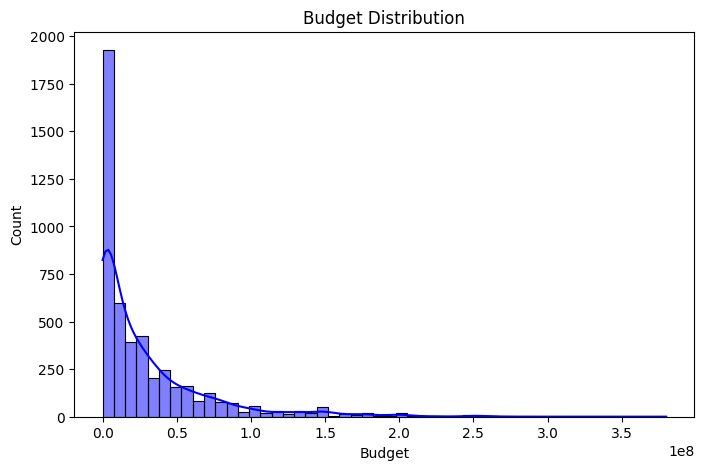

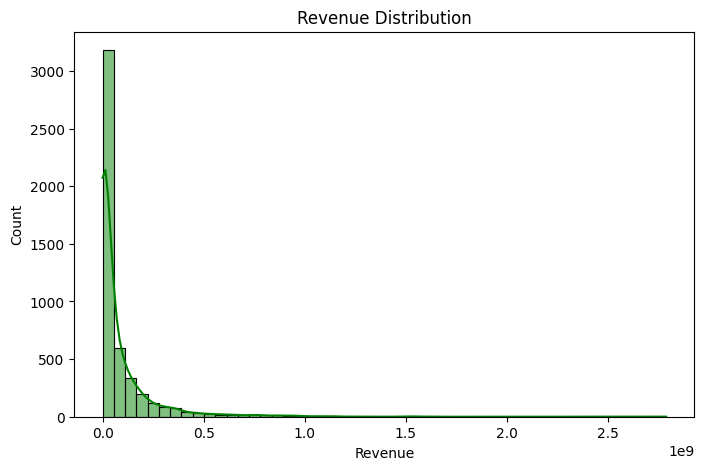

In [28]:

plt.figure(figsize=(8,5))
sns.histplot(df['budget'], bins=50, kde=True, color="blue")
plt.title("Budget Distribution")
plt.xlabel("Budget")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['revenue'], bins=50, kde=True, color="green")
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()


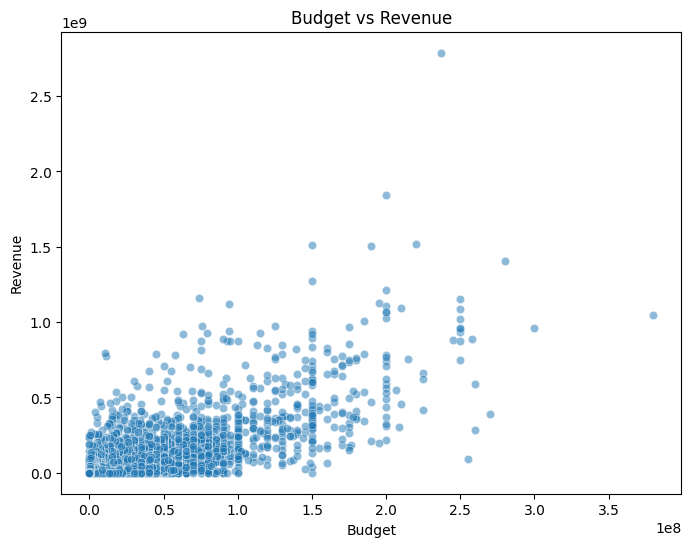

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['budget'], y=df['revenue'], alpha=0.5)
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()


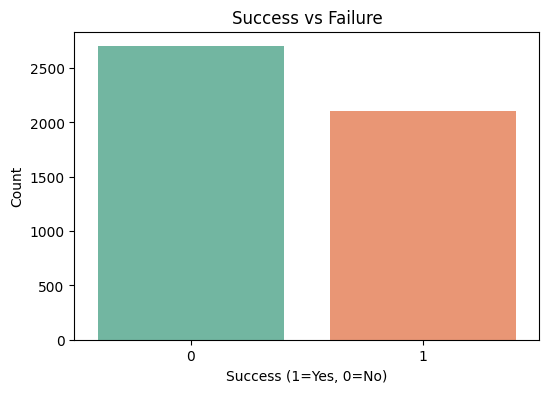

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='success', data=df, palette="Set2")
plt.title("Success vs Failure")
plt.xlabel("Success (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()


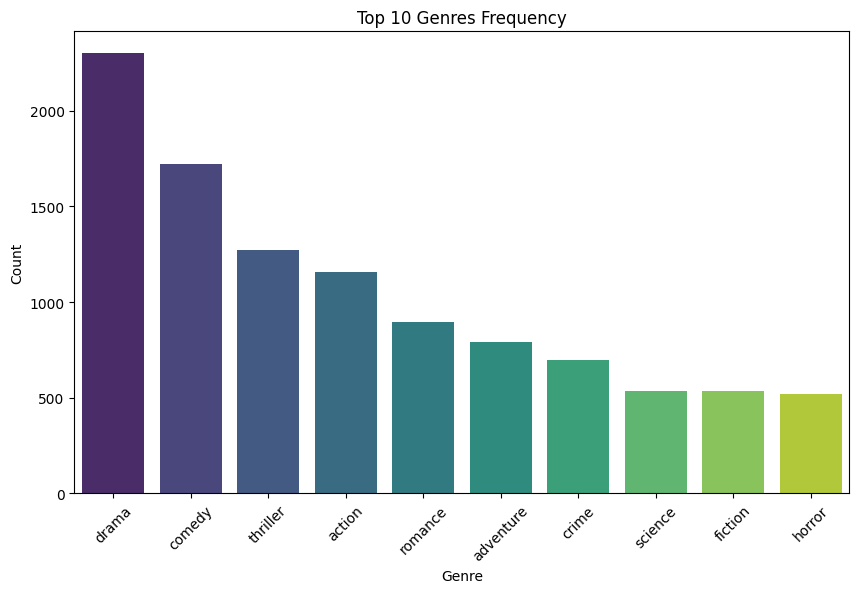

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['genres_str'].str.split().explode().value_counts().head(10).index,
            y=df['genres_str'].str.split().explode().value_counts().head(10).values,
            palette="viridis")
plt.title("Top 10 Genres Frequency")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


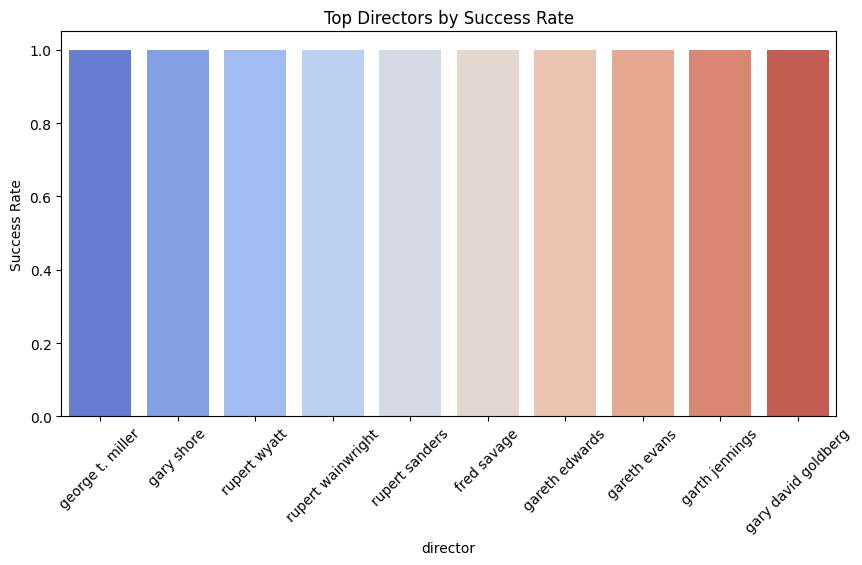

In [32]:
top_directors = df.groupby("director")['success'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.index, y=top_directors.values, palette="coolwarm")
plt.title("Top Directors by Success Rate")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.show()


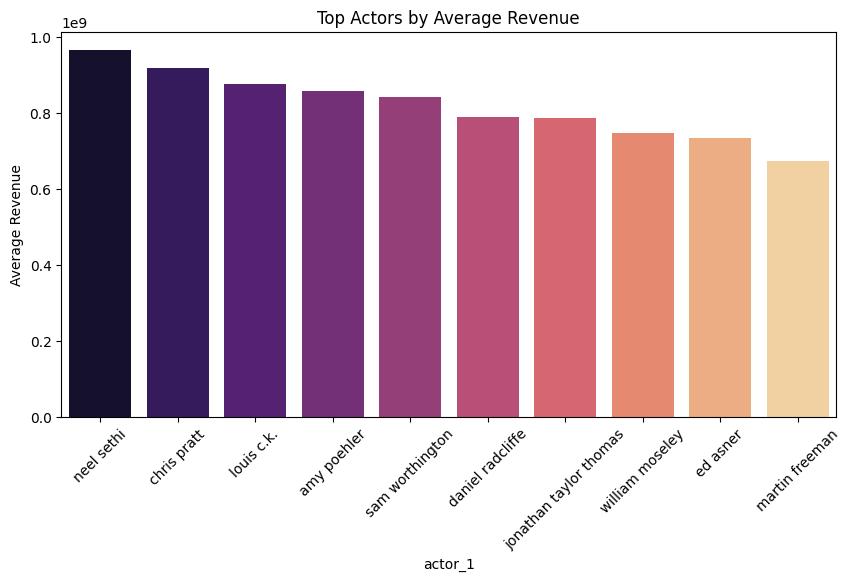

In [33]:
top_actors = df.groupby("actor_1")['revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.index, y=top_actors.values, palette="magma")
plt.title("Top Actors by Average Revenue")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.show()


In [34]:
movies_rev = df.groupby(['title']).sum()['revenue']
movies_rev = movies_rev.sort_values(ascending = False)
movies_rev.head(10)

title
Avatar                        2787965087
Titanic                       1845034188
The Avengers                  1519557910
Jurassic World                1513528810
Furious 7                     1506249360
Avengers: Age of Ultron       1405403694
Frozen                        1274219009
Iron Man 3                    1215439994
Minions                       1156730962
Captain America: Civil War    1153304495
Name: revenue, dtype: int64

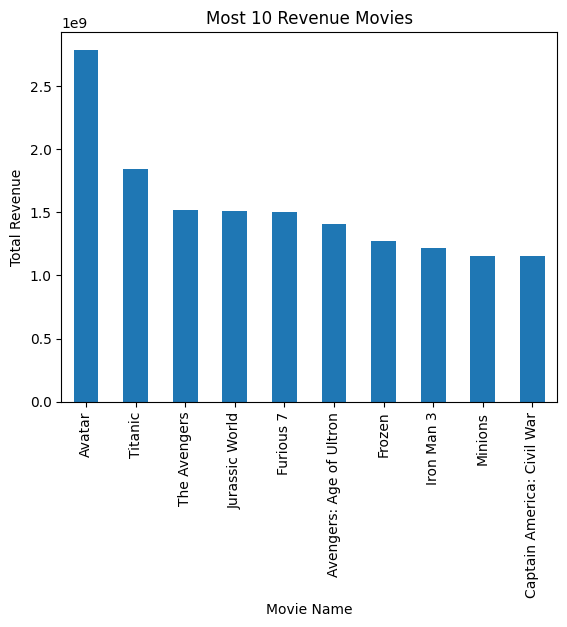

In [35]:
most_10_rev = movies_rev.head(10)
most_10_rev.plot(kind= 'bar')
plt.title('Most 10 Revenue Movies')
plt.xlabel('Movie Name')
plt.ylabel('Total Revenue')
plt.show()

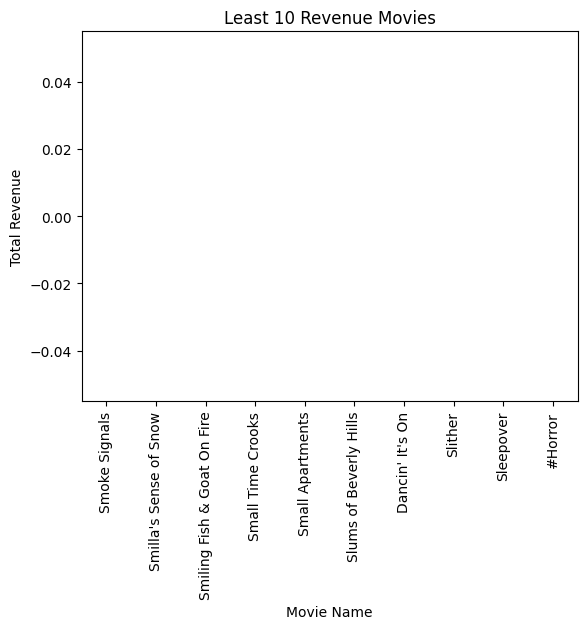

In [36]:
least_10_rev = movies_rev.tail(10)
least_10_rev.plot(kind= 'bar')
plt.title('Least 10 Revenue Movies')
plt.xlabel('Movie Name')
plt.ylabel('Total Revenue')
plt.show()

In [37]:
actor_rev = df.groupby(['actor_1']).sum()['revenue']
actor_rev = actor_rev.sort_values(ascending = False)
actor_rev.head(10)

actor_1
tom cruise           7570390285
tom hanks            7330446178
robert downey jr.    6469496153
johnny depp          6319730820
will smith           5859431885
daniel radcliffe     5538792293
ben stiller          5232397222
bruce willis         4875181368
leonardo dicaprio    4069408116
christian bale       3916471019
Name: revenue, dtype: int64

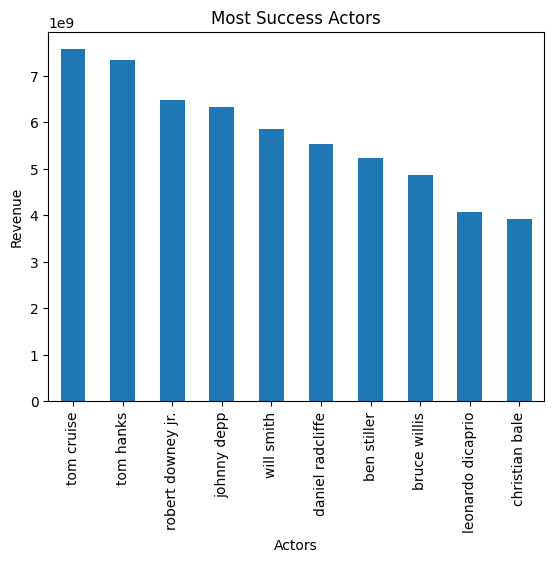

In [38]:
most_10_actor_rev = actor_rev.head(10)
most_10_actor_rev.plot(kind = 'bar')
plt.title('Most Success Actors')
plt.xlabel('Actors')
plt.ylabel('Revenue')
plt.show()

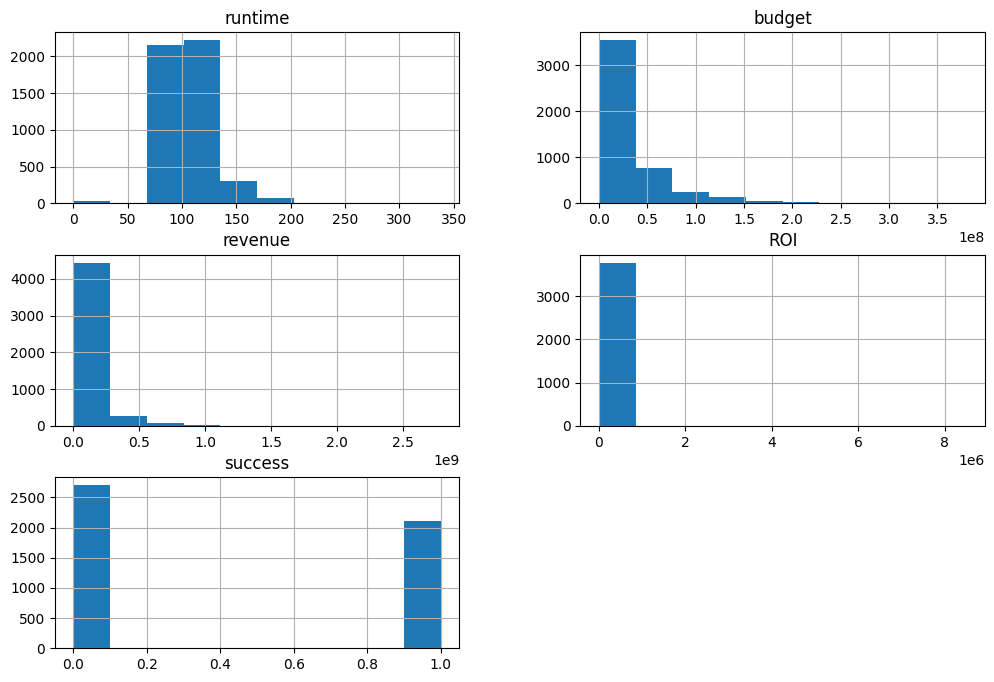

In [39]:
df.hist(figsize=(12,8))
plt.show()

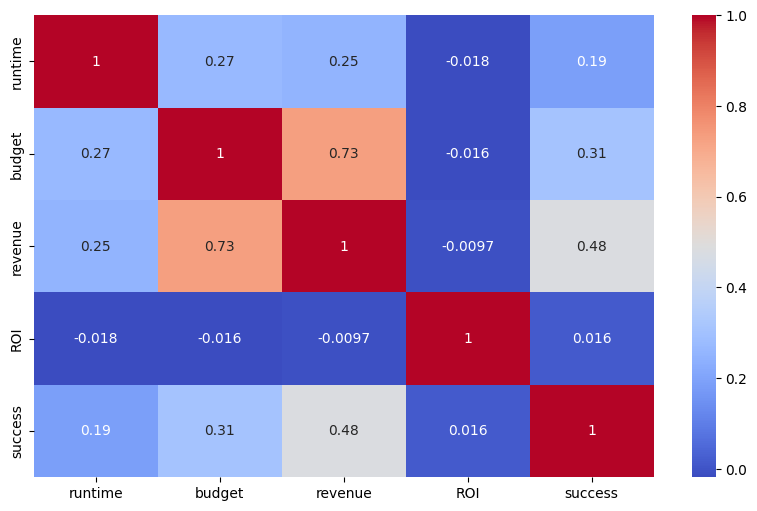

In [40]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [41]:
df['log_budget'] = np.log1p(df['budget'])
df['log_revenue'] = np.log1p(df['revenue'])


In [42]:
df['runtime'].fillna(df['runtime'].median(), inplace=True)
df['ROI'].fillna(df['ROI'].median(), inplace=True)   #df['ROI'].fillna(0, inplace=True) 

In [43]:
# === A) Build global actor frequency & target dictionaries ===
all_actors = pd.concat([df['actor_1'], df['actor_2'], df['actor_3']])

# Frequency dictionary for actors
actor_global_freq = all_actors.value_counts().to_dict()

# Target dictionary for actors (average revenue per actor)
actor_revenue_map = (
    pd.concat([
        df[['actor_1', 'revenue']].rename(columns={'actor_1': 'actor'}),
        df[['actor_2', 'revenue']].rename(columns={'actor_2': 'actor'}),
        df[['actor_3', 'revenue']].rename(columns={'actor_3': 'actor'})
    ])
    .groupby('actor')['revenue'].mean()
    .to_dict()
)

# === B) Build global director frequency & target dictionaries ===
director_global_freq = df['director'].value_counts().to_dict()
director_revenue_map = df.groupby('director')['revenue'].mean().to_dict()

# === C) Apply encoding for actors ===
for col in ['actor_1', 'actor_2', 'actor_3']:
    df[col + '_freq'] = df[col].map(actor_global_freq).fillna(0)
    df[col + '_target'] = df[col].map(actor_revenue_map).fillna(df['revenue'].mean())

# === D) Apply encoding for director ===
df['director_freq'] = df['director'].map(director_global_freq).fillna(0)
df['director_target'] = df['director'].map(director_revenue_map).fillna(df['revenue'].mean())


In [44]:
df.head(10)

,title,production_countries,spoken_languages,runtime,budget,revenue,actor_1,actor_2,actor_3,director,genres_str,keywords_str,production_companies_str,all_actors,ROI,success,log_budget,log_revenue,actor_1_freq,actor_1_target,actor_2_freq,actor_2_target,actor_3_freq,actor_3_target,director_freq,director_target
0,Avatar,"[United States of America, United Kingdom]","[English, Español]",162.0,237000000,2787965087,sam worthington,zoe saldana,sigourney weaver,james cameron,fantasy adventure action science fiction,soldier anti war love affair mind and soul spa...,twentieth century fox film corporation dune en...,"[sam worthington, zoe saldana, sigourney weaver]",11.763566,1,19.283571,21.748578,6.0,6.261268e+08,12.0,3.703433e+08,18.0,1.981745e+08,7,8.405099e+08
1,Pirates of the Caribbean: At World's End,[United States of America],[English],169.0,300000000,961000000,johnny depp,orlando bloom,keira knightley,gore verbinski,fantasy adventure action,shipwreck drug abuse swashbuckler afterlife ex...,second mate productions jerry bruckheimer film...,"[johnny depp, orlando bloom, keira knightley]",3.203333,1,19.519293,20.683485,32.0,2.460739e+08,8.0,4.468792e+08,16.0,1.941067e+08,7,4.538591e+08
2,Spectre,"[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]",148.0,245000000,880674609,daniel craig,christoph waltz,léa seydoux,sam mendes,crime adventure action,secret agent british secret service sequel bas...,columbia pictures b24 danjaq,"[daniel craig, christoph waltz, léa seydoux]",3.594590,1,19.316769,20.596199,12.0,3.623983e+08,8.0,2.975471e+08,1.0,8.806746e+08,7,3.876498e+08
3,The Dark Knight Rises,[United States of America],[English],165.0,250000000,1084939099,christian bale,michael caine,gary oldman,christopher nolan,thriller crime action drama,tragic hero hostage drama destruction dc comic...,dc entertainment legendary pictures warner bro...,"[christian bale, michael caine, gary oldman]",4.339756,1,19.336971,20.804790,21.0,2.046681e+08,17.0,1.541214e+08,19.0,2.048767e+08,8,5.284354e+08
4,John Carter,[United States of America],[English],132.0,260000000,284139100,taylor kitsch,lynn collins,samantha morton,andrew stanton,adventure action science fiction,escape mars medallion 19th century sword and p...,walt disney pictures,"[taylor kitsch, lynn collins, samantha morton]",1.092843,0,19.376192,19.464974,4.0,2.048566e+08,1.0,2.841391e+08,10.0,6.556715e+07,4,5.272613e+08
5,Spider-Man 3,[United States of America],"[English, Français]",139.0,258000000,890871626,tobey maguire,kirsten dunst,james franco,sam raimi,fantasy adventure action,hostility marvel comic sandstorm dual identity...,columbia pictures laura ziskin productions mar...,"[tobey maguire, kirsten dunst, james franco]",3.452991,1,19.368470,20.607711,9.0,3.231040e+08,19.0,1.679262e+08,16.0,2.084721e+08,11,2.848092e+08
6,Tangled,[United States of America],[English],100.0,260000000,591794936,zachary levi,mandy moore,donna murphy,byron howard,animation family,musical selfishness healing gift magic animal ...,walt disney animation studios walt disney pict...,"[zachary levi, mandy moore, donna murphy]",2.276134,1,19.376192,20.198671,2.0,5.174675e+08,9.0,9.698903e+07,2.0,2.963183e+08,1,5.917949e+08
7,Avengers: Age of Ultron,[United States of America],[English],141.0,280000000,1405403694,robert downey jr.,chris hemsworth,mark ruffalo,joss whedon,adventure action science fiction,marvel comic superhero team marvel cinematic u...,prime focus marvel studios revolution sun studios,"[robert downey jr., chris hemsworth, mark ruff...",5.019299,1,19.450300,21.063590,20.0,4.070385e+08,10.0,3.328858e+08,18.0,2.331136e+08,3,9.879437e+08
8,Harry Potter and the Half-Blood Prince,"[United Kingdom, United States of America]",[English],153.0,250000000,933959197,daniel radcliffe,rupert grint,emma watson,david yates,fantasy adventure family,school of witchcraft wizardry magic broom teen...,warner bros. heyday films,"[daniel radcliffe, rupert grint, emma watson]",3.735837,1

In [45]:
df.isna().sum()

title                        0
production_countries         0
spoken_languages             0
runtime                      0
budget                       0
revenue                      0
actor_1                     43
actor_2                     53
actor_3                     63
director                     0
genres_str                   0
keywords_str                 0
production_companies_str     0
all_actors                   0
ROI                          0
success                      0
log_budget                   0
log_revenue                  0
actor_1_freq                 0
actor_1_target               0
actor_2_freq                 0
actor_2_target               0
actor_3_freq                 0
actor_3_target               0
director_freq                0
director_target              0
dtype: int64

# **Data Preprocessing for model**

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_genres = CountVectorizer(max_features=200, token_pattern=r'[^ ]+')
vectorizer_keywords = CountVectorizer(max_features=200, token_pattern=r'[^ ]+')
vectorizer_companies = CountVectorizer(max_features=50, token_pattern=r'[^ ]+')

genres_encoded = vectorizer_genres.fit_transform(df['genres_str']).toarray()
keywords_encoded = vectorizer_keywords.fit_transform(df['keywords_str']).toarray()
companies_encoded = vectorizer_companies.fit_transform(df['production_companies_str']).toarray()


In [47]:
X = np.hstack([
    genres_encoded,
    keywords_encoded,
    companies_encoded,
    df[['actor_1_freq', 'actor_2_freq', 'actor_3_freq', 'director_freq',
        'actor_1_target', 'actor_2_target', 'actor_3_target', 'director_target',
        'budget']].values
])

y_revenue = df['log_revenue']   # for regression
y_success = df['success']   # for classification


# **Split data**

In [48]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_revenue, test_size=0.2, random_state=42)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_success, test_size=0.2, random_state=42)

# **Regression**

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_reg.fit(X_train_reg, y_train_reg)

y_pred = xgb_reg.predict(X_test_reg)
print("RMSE:", mean_squared_error(y_test_reg, y_pred, squared=False))
print("R²:", r2_score(y_test_reg, y_pred))


RMSE: 2.839194296841017
R²: 0.8786052395916242


# **Classification**

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb_cls = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_cls.fit(X_train_cls, y_train_cls)
y_pred_cls = xgb_cls.predict(X_test_cls)

print(classification_report(y_test_cls, y_pred_cls))
print(confusion_matrix(y_test_cls, y_pred_cls))


              precision    recall  f1-score   support

           0       0.88      0.85      0.87       513
           1       0.84      0.87      0.85       449

    accuracy                           0.86       962
   macro avg       0.86      0.86      0.86       962
weighted avg       0.86      0.86      0.86       962

[[438  75]
 [ 58 391]]


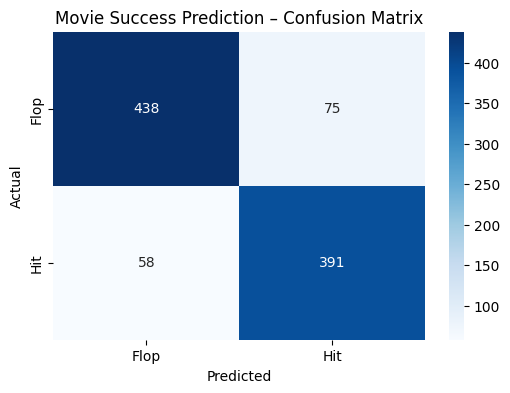

In [51]:
cm = confusion_matrix(y_test_cls, y_pred_cls)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Flop", "Hit"], yticklabels=["Flop", "Hit"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Movie Success Prediction – Confusion Matrix")
plt.show()


# **Test**

In [52]:
import joblib

# Save trained models
joblib.dump(xgb_reg, "xgb_regressor.pkl")
joblib.dump(xgb_cls, "xgb_classifier.pkl")

# Save vectorizers
joblib.dump(vectorizer_genres, "vectorizer_genres.pkl")
joblib.dump(vectorizer_keywords, "vectorizer_keywords.pkl")
joblib.dump(vectorizer_companies, "vectorizer_companies.pkl")

# Save frequency dictionaries
freq_dicts = {
    col: df[col].value_counts().to_dict()
    for col in ['actor_1', 'actor_2', 'actor_3', 'director']
}

# Save target encoding dictionaries
target_dicts = {
    col: df.groupby(col)['revenue'].mean().to_dict()
    for col in ['actor_1', 'actor_2', 'actor_3', 'director']
}

joblib.dump(freq_dicts, "freq_dicts.pkl")
joblib.dump(target_dicts, "target_dicts.pkl")


['target_dicts.pkl']

In [53]:
# Load vectorizers & dictionaries
vectorizer_genres = joblib.load("vectorizer_genres.pkl")
vectorizer_keywords = joblib.load("vectorizer_keywords.pkl")
vectorizer_companies = joblib.load("vectorizer_companies.pkl")

freq_dicts = joblib.load("freq_dicts.pkl")
target_dicts = joblib.load("target_dicts.pkl")

# Global mean revenue as fallback
global_mean_revenue = df['revenue'].mean()

def preprocess_input(genres, keywords, companies, actor_1, actor_2, actor_3, director, budget):
    genres = [item.lower() for item in genres]
    keywords = [item.lower() for item in keywords]
    companies = [item.lower() for item in companies]
    actor_1 = actor_1.lower()
    actor_2 = actor_2.lower()
    actor_3 = actor_3.lower()
    director = director.lower()
    # 1️⃣ Encode text features
    genres_encoded = vectorizer_genres.transform([" ".join(genres)]).toarray()
    keywords_encoded = vectorizer_keywords.transform([" ".join(keywords)]).toarray()
    companies_encoded = vectorizer_companies.transform([" ".join(companies)]).toarray()

    # 2️⃣ Safe lookup
    def get_feature_value(mapping, key, default=0):
        return mapping.get(key, default)

    # Frequencies
    actor_1_freq = get_feature_value(freq_dicts['actor_1'], actor_1)
    actor_2_freq = get_feature_value(freq_dicts['actor_2'], actor_2)
    actor_3_freq = get_feature_value(freq_dicts['actor_3'], actor_3)
    director_freq_val = get_feature_value(freq_dicts['director'], director)

    # Target encodings
    actor_1_target = get_feature_value(target_dicts['actor_1'], actor_1, global_mean_revenue)
    actor_2_target = get_feature_value(target_dicts['actor_2'], actor_2, global_mean_revenue)
    actor_3_target = get_feature_value(target_dicts['actor_3'], actor_3, global_mean_revenue)
    director_target_val = get_feature_value(target_dicts['director'], director, global_mean_revenue)

    # 3️⃣ Numeric features
    numeric_features = np.array([
        actor_1_freq, actor_2_freq, actor_3_freq, director_freq_val,
        actor_1_target, actor_2_target, actor_3_target, director_target_val,
        budget
    ]).reshape(1, -1)

    # 4️⃣ Combine
    X_input = np.hstack([
        genres_encoded,
        keywords_encoded,
        companies_encoded,
        numeric_features
    ])

    return X_input


In [54]:
new_movie = preprocess_input(
    genres=["Action", "Adventure", "Sci-Fi"],
    keywords=["future", "time travel", "hero"],
    companies=["warner Bros"],
    actor_1="Tom Cruise",
    actor_2="johnny depp",
    actor_3="zoe saldana",
    director="Christopher Nolan",
    budget=270000000
)
# sam worthington zoe saldana sigourney weaver / Tom Cruise
# [johnny depp, orlando bloom, keira knightley

print(new_movie.shape)  # should be (1, total_features)

# Predict revenue
reg_pred = xgb_reg.predict(new_movie)
predicted_revenue = int(round(np.expm1(reg_pred[0])))  # whole number

# Predict success + probability
cls_pred = xgb_cls.predict(new_movie)
cls_prob = xgb_cls.predict_proba(new_movie)[0][1]  # probability of success (class=1)

print(f"🎬 Predicted Revenue: ${predicted_revenue:,}")  # formatted with commas
print(f"✅ Success Prediction: {'Yes' if cls_pred[0] == 1 else 'No'} "
      f"(Confidence: {cls_prob*100:.2f}%)")


(1, 281)
🎬 Predicted Revenue: $743,257,984
✅ Success Prediction: Yes (Confidence: 99.41%)
